In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse, r2_score as r2
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split
# from sklearn.pipeline import Pipeline, make_pipeline
# from sklearn.base import BaseEstimator, TransformerMixin

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
def get_classification_report(y_true, y_pred):
    pred_list = []
    
    for el in y_pred:
        if el < 0.5:
            pred_list.append(0)
        else:
            pred_list.append(1)
    
    print(classification_report(y_true, pred_list))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_true, pred_list))

In [4]:
def ROC_curve(y_test, y_score):

    sns.set(font_scale=1.5)
    sns.set_color_codes("muted")

    plt.figure(figsize=(10, 8))
    fpr, tpr, thresholds_ = roc_curve(y_test, y_score, pos_label=1)
    lw = 2
    plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.show()

In [5]:
def pr_curve(y_test, y_score):

    sns.set(font_scale=1.5)
    sns.set_color_codes("muted")

    plt.figure(figsize=(10, 8))
    fpr, tpr, thresholds_ = precision_recall_curve(y_test, y_score, pos_label=1)
    lw = 2
    plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.show()

In [6]:
df = pd.read_csv('train_case2.csv', delimiter=';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [7]:
y = 'cardio'

X_train, X_test, y_train, y_test = train_test_split(df.drop(y, 1), 
                                                    df[y], random_state=0)

### LogReg

In [8]:
lr_classifier = LogisticRegression(C=0.1, solver='sag')

#запустим кросс-валидацию
cv_scores = cross_val_score(lr_classifier, X_train, y_train, cv=3, scoring='roc_auc')
cv_score = np.mean(cv_scores)
print('CV score is {}'.format(cv_score))

lr_classifier.fit(X_train, y_train)
y_score_lr = lr_classifier.predict_proba(X_test)[:, 1]

CV score is 0.6500632095714415


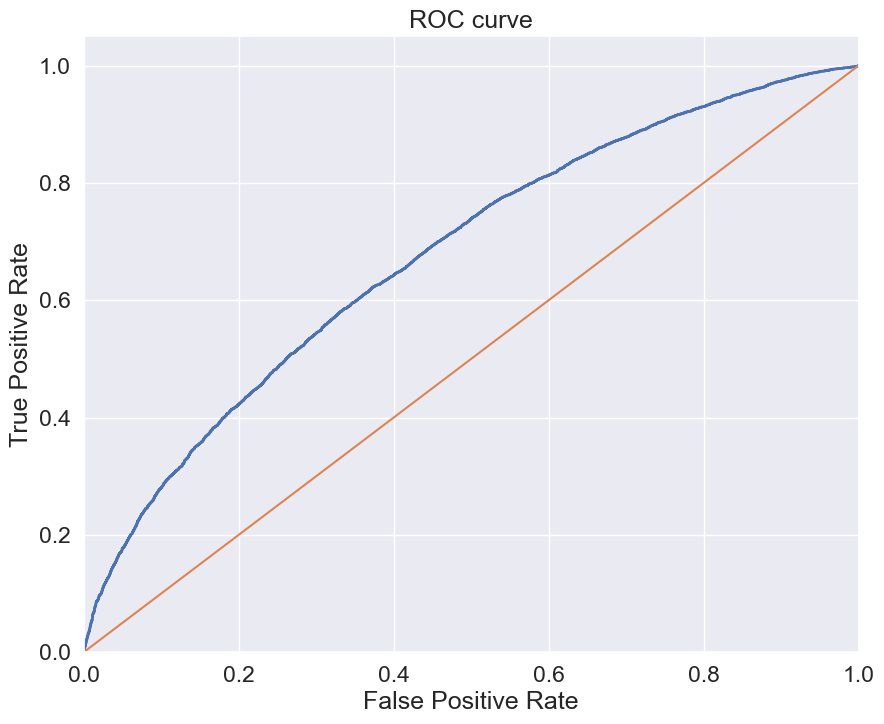

In [12]:
ROC_curve(y_test, y_score_lr)

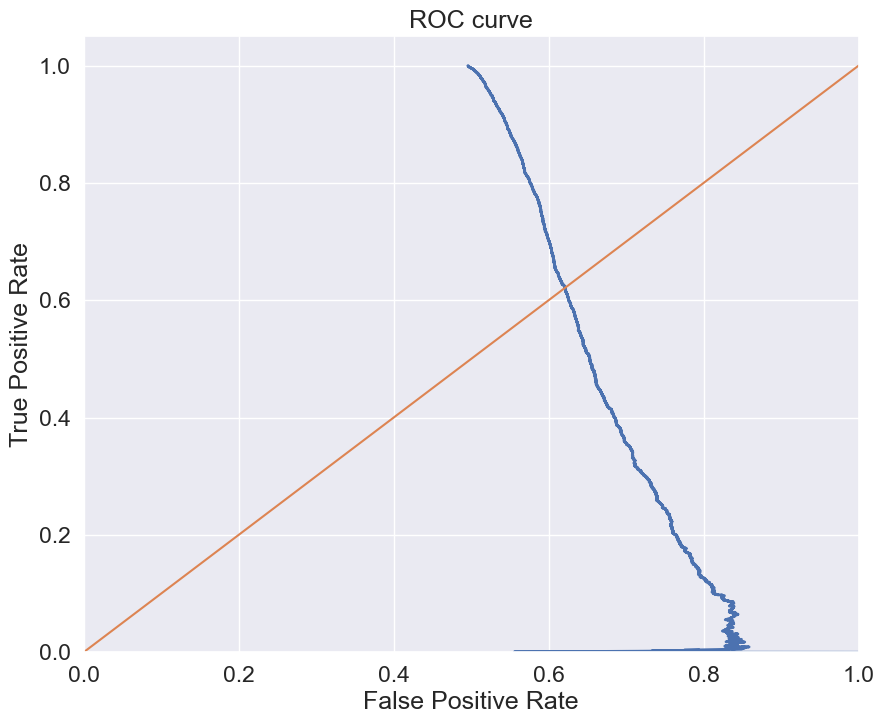

In [13]:
pr_curve(y_test, y_score_lr)

In [14]:
get_classification_report(y_test, y_score_lr)

              precision    recall  f1-score   support

           0       0.66      0.51      0.57      8820
           1       0.59      0.73      0.65      8680

    accuracy                           0.62     17500
   macro avg       0.63      0.62      0.61     17500
weighted avg       0.63      0.62      0.61     17500

CONFUSION MATRIX

col_0      0     1
cardio            
0       4512  4308
1       2363  6317


### RandFor

In [15]:
rf_classifier = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=100)

#запустим кросс-валидацию
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=3, scoring='roc_auc')
cv_score = np.mean(cv_scores)
print('CV score is {}'.format(cv_score))

rf_classifier.fit(X_train, y_train)
y_score_rf = rf_classifier.predict(X_test)

CV score is 0.796965148616032


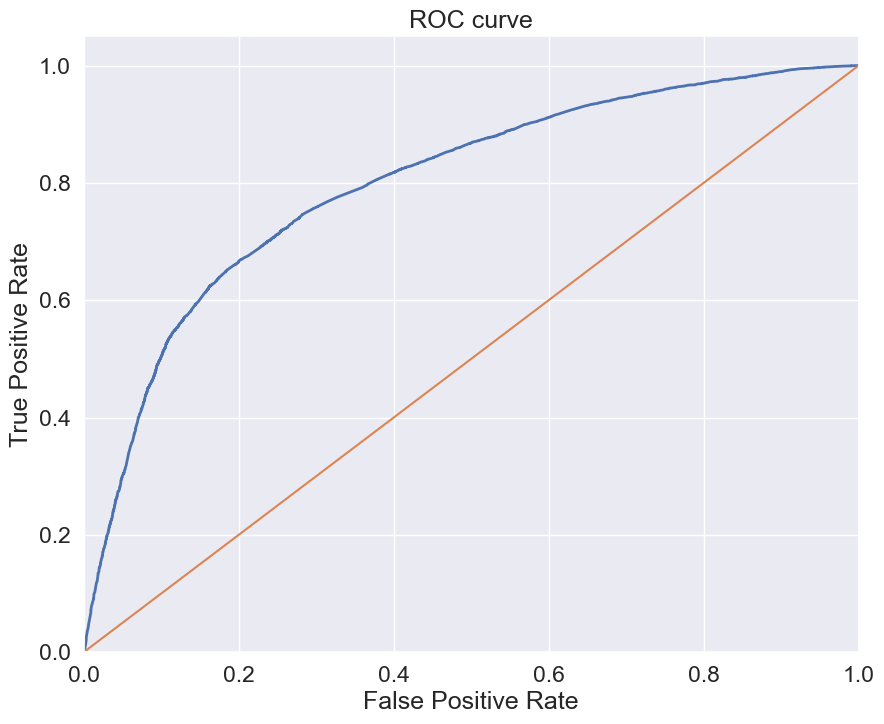

In [16]:
ROC_curve(y_test, y_score_rf)

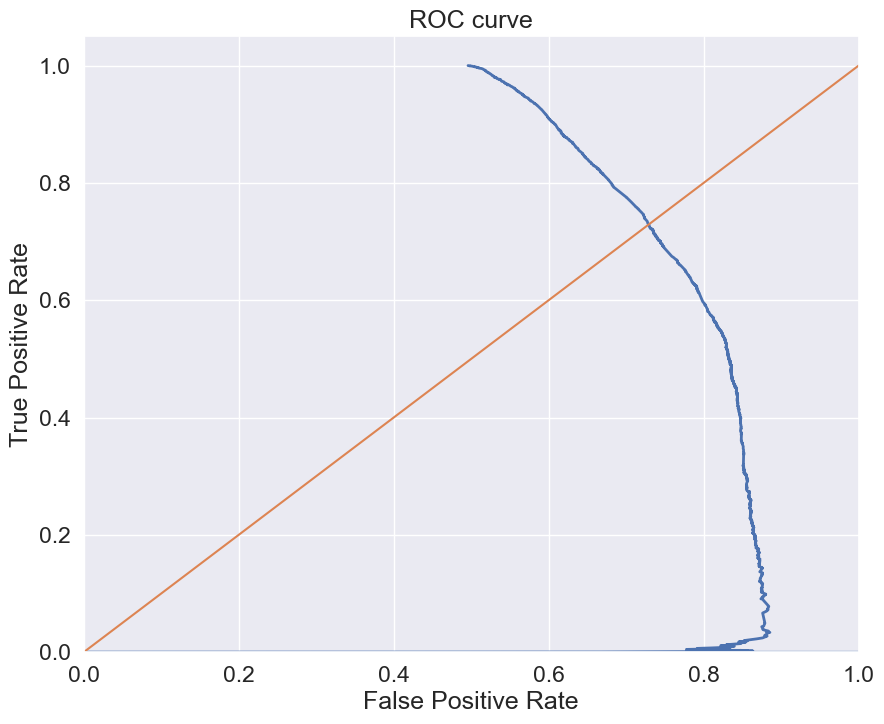

In [17]:
pr_curve(y_test, y_score_rf)

In [18]:
get_classification_report(y_test, y_score_rf)

              precision    recall  f1-score   support

           0       0.72      0.76      0.74      8820
           1       0.74      0.70      0.72      8680

    accuracy                           0.73     17500
   macro avg       0.73      0.73      0.73     17500
weighted avg       0.73      0.73      0.73     17500

CONFUSION MATRIX

col_0      0     1
cardio            
0       6717  2103
1       2593  6087
